In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Load the dataset

In [86]:
df = pd.read_csv('/content/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [92]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType']=label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG']=label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina']=label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=label_encoder.fit_transform(df['ST_Slope'])

In [93]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,9.180000e+02,918.000000,918.000000,9.180000e+02,918.000000,918.000000,918.000000,9.180000e+02,918.000000,9.180000e+02,918.000000,918.000000
mean,-1.083616e-16,0.789760,0.781046,1.954380e-16,0.000000,0.233115,0.989107,4.953675e-16,0.404139,1.238419e-16,1.361656,0.553377
std,1.000545e+00,0.407701,0.956519,1.000545e+00,1.000545,0.423046,0.631671,1.000545e+00,0.490992,1.000545e+00,0.607056,0.497414
min,-2.706015e+00,0.000000,0.000000,-7.154995e+00,-1.818435,0.000000,0.000000,-3.018469e+00,0.000000,-3.271482e+00,0.000000,0.000000
25%,-6.906294e-01,1.000000,0.000000,-6.699346e-01,-0.233704,0.000000,1.000000,-6.605778e-01,0.000000,-8.324324e-01,1.000000,0.000000
50%,5.188098e-02,1.000000,0.000000,-1.295128e-01,0.221363,0.000000,1.000000,4.678968e-02,0.000000,-2.695748e-01,1.000000,1.000000
75%,6.883185e-01,1.000000,2.000000,4.109089e-01,0.623835,0.000000,1.000000,7.541571e-01,1.000000,5.747115e-01,2.000000,1.000000
max,2.491558e+00,1.000000,3.000000,3.653439e+00,3.697252,1.000000,2.000000,2.561874e+00,1.000000,4.983762e+00,2.000000,1.000000


In [94]:
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [97]:
X =df.drop('HeartDisease',axis=1)
y=df['HeartDisease']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [98]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [99]:
knn.predict(X_test)

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1])

In [100]:
accuracy_score(y_test,knn.predict(X_test))

0.8586956521739131

In [101]:
k_values = range(1, 50,2)

In [102]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy

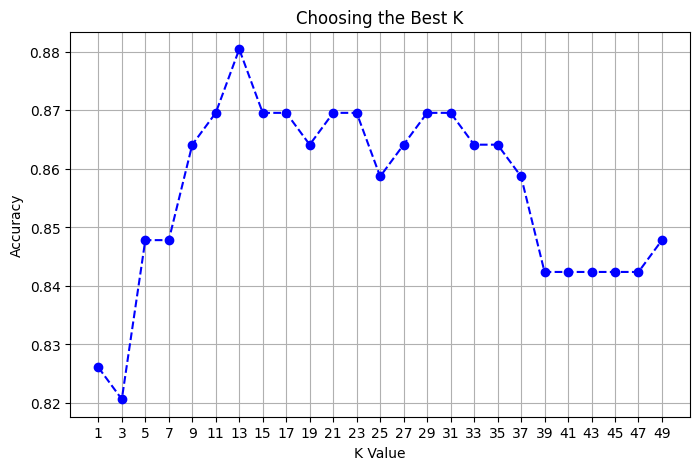

Best K: 13


<Figure size 640x480 with 0 Axes>

In [103]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.tight_layout()
# Find best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")

In [108]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [109]:
accuracy_score(y_test,knn.predict(X_test))

0.8804347826086957

In [110]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        86
           1       0.87      0.84      0.85        98

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Confusion Matrix

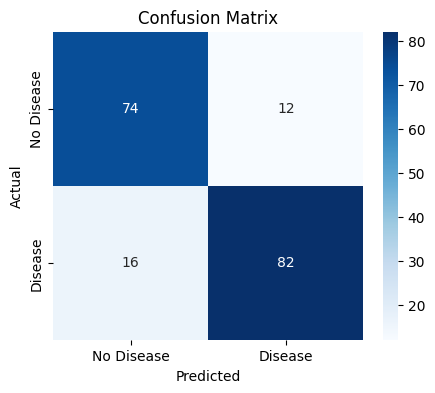

In [111]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [112]:
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

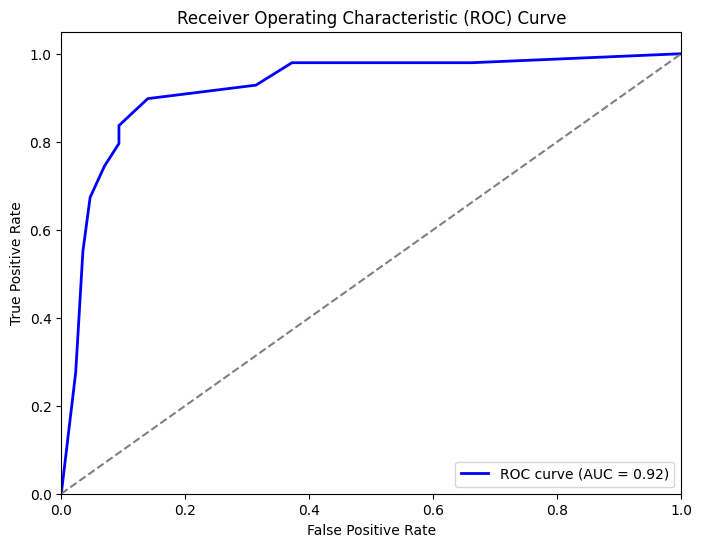

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line (diagonal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()